# 信頼区間, 仮説検定

# 分析結果の見方

### データの読み込み

『家計調査』2017年11月、第2−6表「年間収入階級別1世帯当たり1か月間の収入と支出」から作成した所得階級と支出のデータ`kakei201709_l18.csv`を用いる\[^url\].

月間消費支出(円)(`CONS`), 月間消費支出(1万円)(`CONS1`),
年間収入(1万円)(INC), 有業人員(人)(`WORK`). いずれも調査世帯の平均値.

In [ ]:
library(pacman)
p_load(readr, here)
kakei <- readr::read_csv(here("data", "kakei201709_l18.csv"))

Rows: 18 Columns: 4
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (4): CONS, CONS1, INC, WORK

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

### 回帰分析の実行

応答変数を`CONS1`, 説明変数を`INC`として単回帰分析を行う.

In [ ]:
res <- lm(CONS1 ~ INC, data = kakei)

### 結果の表示

`jtools`パッケージを利用して回帰分析の結果を表示する.

In [ ]:
p_load(jtools)
summ(res)

MODEL INFO:
Observations: 18
Dependent Variable: CONS1
Type: OLS linear regression 

MODEL FIT:
F(1,16) = 584.11, p = 0.00
R² = 0.97
Adj. R² = 0.97 

Standard errors:OLS
------------------------------------------------
                     Est.   S.E.   t val.      p
----------------- ------- ------ -------- ------
(Intercept)         14.35   0.73    19.71   0.00
INC                  0.02   0.00    24.17   0.00
------------------------------------------------

### 結果の読み方

下方の表に推定結果がまとめられている. Est.(回帰係数)は以前紹介した通り.
S.E.の列に標準誤差が示される.
おおよそ$\pm 2$倍して(正確な値は信頼区間)0を跨がなければ符号が変わらないのでその変数は意味が有る(有意)と言える.

t val.にt値が示される. 回帰係数が0でないかどうかを検定した場合のt値.
回帰係数が0であるという帰無仮説が棄却できるかを検証する.

最後の列のpにp値が示される.
帰無仮説が正しい(回帰係数が0である)と仮定した場合に,
分析したデータが得られる確率($P(D|H_0)$).
事前に有意水準($\alpha$)を事前に設定し, それを下回るか否かで判断する.
p値の大きさによって星をつけたり,
小さいほどよいという解釈をしたりすることは本来のNeyman-Pearson流の考え方ではない.

### 信頼区間の示し方

回帰係数の95%信頼区間を表示するには, `summ(confint = TRUE)`を指定する.
S.E.の代わりに信頼区間の下限と上限が示される.
信頼区間が0をまたいでいなければ符号が変わらず有意な変数だと言える.
`ci.width`という引数で信頼係数(信頼区間の幅)を変えることができる.
指定をしない場合はデフォルトで95%信頼区間となる.
有意水準と信頼係数は表裏の関係にあるため,
有意水準に合わせて信頼係数を変更する.

In [ ]:
summ(res, 
     confint  = TRUE, 
     ci.width = .95)

MODEL INFO:
Observations: 18
Dependent Variable: CONS1
Type: OLS linear regression 

MODEL FIT:
F(1,16) = 584.11, p = 0.00
R² = 0.97
Adj. R² = 0.97 

Standard errors:OLS
---------------------------------------------------------
                     Est.    2.5%   97.5%   t val.      p
----------------- ------- ------- ------- -------- ------
(Intercept)         14.35   12.81   15.89    19.71   0.00
INC                  0.02    0.02    0.02    24.17   0.00
---------------------------------------------------------

### t値の求め方

t値は回帰係数を標準誤差で除することで求めることができる.

In [ ]:
res$coefficients[2] / summary(res)$coefficients[2, 2]

     INC 
24.16845 

[1] TRUE

### p値

p値は帰無仮説が正しい場合に分析したデータが得られる確率.
t分布からt値が得られる確率を求める. 両側検定のため2倍する.

In [ ]:
p_load(magrittr)
summary(res)$coefficients[2, 3] |>
  pt(df = 16, lower.tail = FALSE) |> 
  multiply_by(2)

[1] 5.074551e-14

[1] 5.074551e-14

### p値のグラフ化

t分布を描いて直感的にp値を捉える.

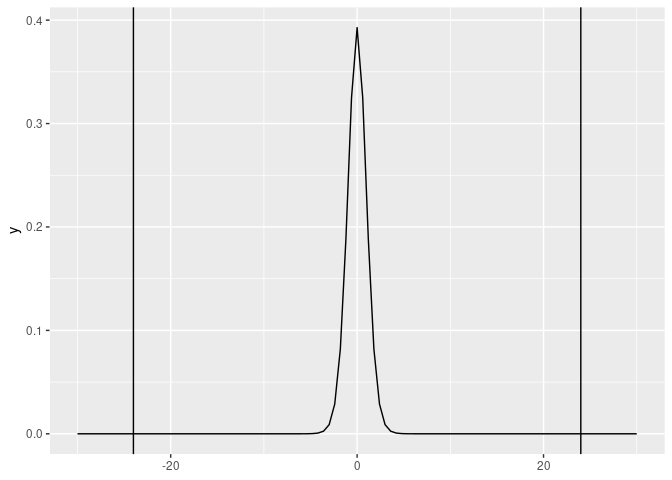

In [ ]:
p_load(ggplot2)
ggplot(data = NULL) +
  xlim(-30, 30) +
  geom_function(fun  = dt,
                args = list(df = 16)) +
  geom_vline(xintercept = 24) +
  geom_vline(xintercept = -24)

# シミュレーションによる理解

## データの準備

### データの準備

ここからの演習ではシミュレーションデータを用いる.
母集団としてサイズが100万で平均2,
分散4の正規分布に従う説明変数のデータを作成する. 応答変数は定数項が2,
回帰係数は3とする.

In [ ]:
p_load(withr, dplyr, tibble)
pop <- with_seed(
  2718,
  tibble(
    x = rnorm(n    = 1000000,
              mean = 2,
              sd   = 4)) |> 
    mutate(y = 2 + 3 * x + rnorm(n = 1000000)))

### 母集団のデータの概要

母集団のデータの概要を確認する.

In [ ]:
summary(pop)

       x                  y           
 Min.   :-16.9822   Min.   :-49.1780  
 1st Qu.: -0.6958   1st Qu.: -0.1162  
 Median :  1.9975   Median :  7.9842  
 Mean   :  1.9993   Mean   :  7.9982  
 3rd Qu.:  4.6972   3rd Qu.: 16.1196  
 Max.   : 23.2266   Max.   : 71.0073  

### 母集団の回帰係数

母集団を作成した際に利用した係数と推定された回帰係数は一致する.

In [ ]:
pop_lm <- lm(y ~ x, data = pop)
summ(pop_lm)

MODEL INFO:
Observations: 1000000
Dependent Variable: y
Type: OLS linear regression 

MODEL FIT:
F(1,999998) = 144324145.11, p = 0.00
R² = 0.99
Adj. R² = 0.99 

Standard errors:OLS
-------------------------------------------------
                    Est.   S.E.     t val.      p
----------------- ------ ------ ---------- ------
(Intercept)         2.00   0.00    1790.45   0.00
x                   3.00   0.00   12013.50   0.00
-------------------------------------------------

### 別の母集団の準備

-   説明変数の効果の小さな母集団も用意する

In [ ]:
pop2 <- with_seed(
  2718,
  tibble(
    x = rnorm(n    = 1000000,
              mean = 2, 
              sd   = 4)) |> 
    mutate(y = 2 + 0.1 * x + rnorm(n  = 1000000,
                                   sd = 5)))

### 別の母集団のデータの概要

母集団のデータの概要を確認する.

In [ ]:
summary(pop2)

       x                  y          
 Min.   :-16.9822   Min.   :-24.814  
 1st Qu.: -0.6958   1st Qu.: -1.184  
 Median :  1.9975   Median :  2.202  
 Mean   :  1.9993   Mean   :  2.202  
 3rd Qu.:  4.6972   3rd Qu.:  5.585  
 Max.   : 23.2266   Max.   : 27.175  

### 別の母集団の回帰係数

母集団を作成した際に利用した係数と推定された回帰係数は一致する.

In [ ]:
pop_lm2 <- lm(y ~ x, data = pop2)
summ(pop_lm2)

MODEL INFO:
Observations: 1000000
Dependent Variable: y
Type: OLS linear regression 

MODEL FIT:
F(1,999998) = 6525.26, p = 0.00
R² = 0.01
Adj. R² = 0.01 

Standard errors:OLS
-----------------------------------------------
                    Est.   S.E.   t val.      p
----------------- ------ ------ -------- ------
(Intercept)         2.00   0.01   358.10   0.00
x                   0.10   0.00    80.78   0.00
-----------------------------------------------

## サンプルサイズと回帰係数

### 標本による回帰

標本としてサイズが5, 10, 30, 100, 1000, 5000のデータを無作為抽出し,
回帰分析を行う. `confint()`を利用して回帰係数の95%信頼区間を得る.

In [ ]:
p_load(purrr)
sample_lm <- with_seed(
  2718,
  list(5, 10, 30, 100, 1000, 5000) |> 
    purrr::map(\(size) slice_sample(pop,
                                    n = size)) |>
    purrr::set_names(5, 10, 30, 100, 1000, 5000) |> 
    purrr::map(\(data) lm(y ~ x, data = data)) |> 
    purrr::map(\(result) confint(result,
                                 parm = "x") |> 
                     as_tibble()) |> 
    list_rbind(names_to = "size"))

### 標本による回帰結果の図示

結果を確認するときちんと95%信頼区間の範囲内に真値があることがわかる.

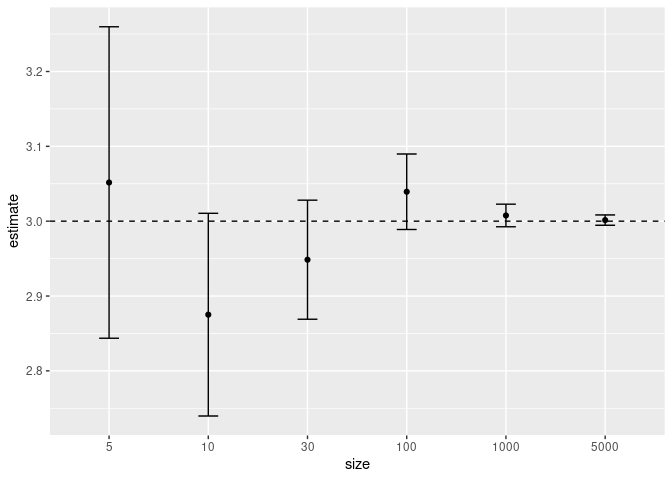

In [ ]:
sample_lm |> 
  rename(low = 2, high = 3) |> 
  mutate(estimate = (low + high) / 2) |> 
  mutate(size = as.numeric(size) |> 
           as.factor()) |> 
  ggplot() +
  geom_point() +
  aes(x = size,
      y = estimate) +
  geom_errorbar(aes(x    = size, 
                    ymin = low,
                    ymax = high), 
                width = .2) +
  geom_hline(yintercept = 3,
             linetype   = "dashed")

## サンプルサイズと回帰係数(回帰係数の小さい場合)

### 標本による回帰

標本としてサイズが5, 10, 30, 100, 1000, 5000のデータを無作為抽出し,
回帰分析を行う. `confint()`を利用して回帰係数の95%信頼区間を得る.

In [ ]:
sample_lm2 <- with_seed(
  2718,
  list(5, 10, 30, 100, 1000, 5000) |> 
    purrr::map(\(size) slice_sample(pop2,
                                    n = size)) |>
    purrr::set_names(5, 10, 30, 100, 1000, 5000) |> 
    purrr::map(\(data) lm(y ~ x, data = data)) |> 
    purrr::map(\(result) confint(result,
                                 parm = "x") |> 
                 as_tibble()) |> 
    list_rbind(names_to = "size"))

### 標本による回帰結果の図示

結果を確認するときちんと95%信頼区間の範囲内に真値があることがわかる.
説明変数の効果が小さい場合,
サンプルサイズが小さいと帰無仮説を棄却できない.

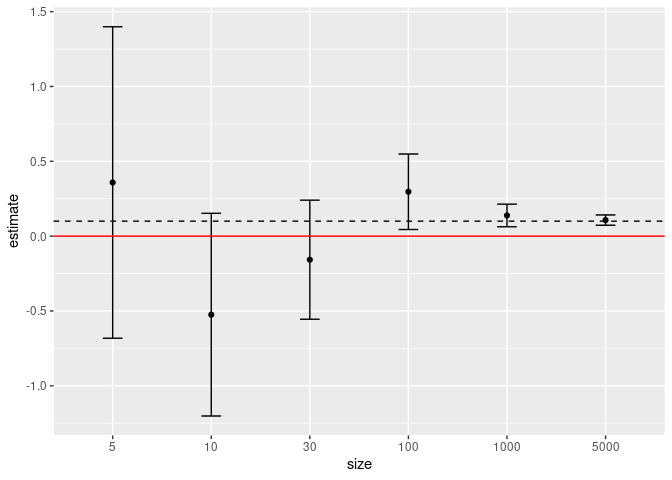

In [ ]:
sample_lm2 |> 
  rename(low = 2, high = 3) |> 
  mutate(estimate = (low + high) / 2) |> 
  mutate(size = as.numeric(size) |> 
           as.factor()) |> 
  ggplot() +
  geom_point() +
  aes(x = size,
      y = estimate) +
  geom_errorbar(aes(x    = size, 
                    ymin = low,
                    ymax = high), 
                width = .2) +
  geom_hline(yintercept = 0.1,
             linetype   = "dashed") +
  geom_hline(yintercept = 0,
             colour     = "red")

## 信頼区間の意味

### モンテカルロ・シミュレーション

初めに作った母集団からサイズ300の標本を1000個作成し,
xの回帰係数の95%信頼区間を求める.
信頼区間に真値(母集団の係数)を含むか否かのダミー変数を作成する.

In [ ]:
sim_data <- with_seed(
  2718,
  map(1:1000,
      \(x) slice_sample(pop,
                        n = 300)) |> 
    map(\(data) lm(y ~ x, data = data)) |>
    purrr::set_names(1:1000) |> 
    map(\(result) confint(result,
                          parm = "x") |> 
              as_tibble()) |>
    list_rbind() |> 
    rename(low = 1, high = 2) |> 
    mutate(estimate = (low + high) / 2) |> 
    mutate(TF = low < pop_lm$coefficients[2] &
            high > pop_lm$coefficients[2])) 

### 真値を含む割合

真値を含む割合は, 約95%に収束する.

In [ ]:
sim_data |> 
  summarise(TF        = mean(TF),
            conf_low  = mean(low),
            estimate  = mean(estimate),
            conf_high = mean(high))

# A tibble: 1 × 4
     TF conf_low estimate conf_high
  <dbl>    <dbl>    <dbl>     <dbl>
1 0.961     2.97     3.00      3.03

### 95%信頼区間を図示

作成データからさらに100個抽出し, 95%信頼区間をプロットする.

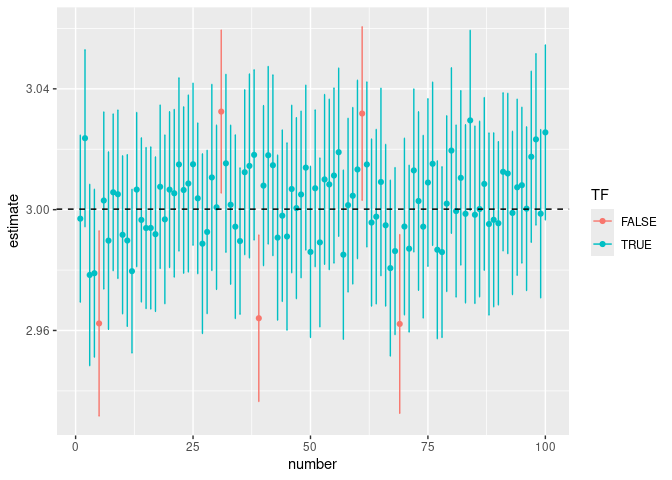

In [ ]:
with_seed(
  2718,
  sim_data |> 
    mutate(TF = as.factor(TF)) |> 
    slice_sample(n = 100) |> 
    mutate(number = row_number())) |> 
    ggplot() +
    aes(x      = number, 
        y      = estimate, 
        colour = TF) +
  geom_point() +
  geom_errorbar(aes(ymin = low, 
                    ymax = high), 
                width = .2) +
  geom_hline(
    yintercept = pop_lm$coefficients[2],
    linetype   = "dashed", 
    colour     = "black")